## 《合成孔径雷达成像——算法与实现》中2.5.3 复信号采样


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [4]:
#% 设置时间长度T; 带宽BW; 初始频率f0
T  = 1;
BW = 300;
k  = BW/T;#% 斜率

#%% 初始复信号
#% 生成时间
dt_0 = 1/1200;
t_0  = np.arange(0,T,dt_0)
fs_0 = 1/dt_0;
#% 初始信号长度
N_0  = len(t_0);
#% 幅度修正
p0_0 = t_0+2;
p_max_0 = np.max(p0_0);
p_0 = p0_0/p_max_0;
#% 频率
f_0 = np.arange(0,N_0,1)*fs_0/N_0 - fs_0/2;

#%% 采样复信号
#% 生成时间
dt = 1/400;
t  = np.arange(0,T,dt);
fs = 1/dt;
#% 初始信号长度
N  = len(t);
#% 幅度修正
p0 = t+2;
p_max = np.max(p0);
p = p0/p_max;
#% 频率
f = np.arange(0,N,1)*fs/N - fs/2;



<Figure size 432x288 with 0 Axes>

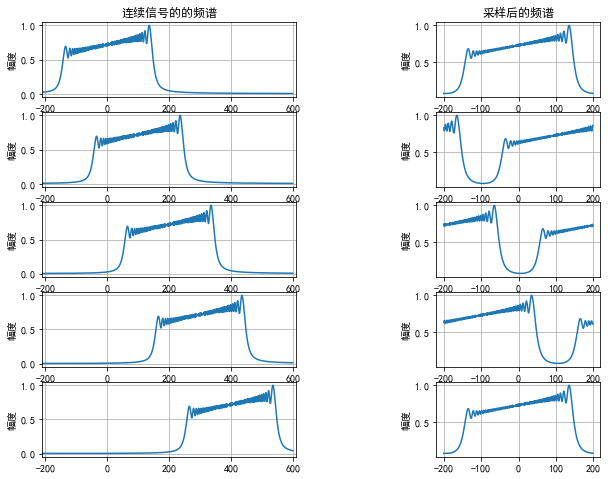

In [5]:
#%% 生成信号
plt.figure(figsize=(10,8));
for i in range(5):
    f0 = 30+i*100;
    #%初始信号
    s0 = np.exp( 1j*2*np.pi*((f0-180)*t_0+0.5*k*t_0**2))*p_0; # % 复数基带
    F0 = np.fft.fftshift(np.fft.fft(s0,N_0));
    F0 = F0/np.max(np.abs(F0));
    #%采样信号
    s = np.exp( 1j*2*np.pi*((f0-180)*t+0.5*k*t**2))*p;  #% 复数基带
    F = np.fft.fftshift(np.fft.fft(s,N));
    F = F/np.max(np.abs(F));
    #%绘图

    plt.subplot(5,2,2*i+1);plt.plot(f_0,np.abs(F0));plt.ylabel('幅度')#;grid on;xlim([-210,610])
    plt.grid();plt.xlim((-210,610))
    if i == 0:
        plt.title('连续信号的的频谱')
    plt.subplot(5,3,3*i+3 );plt.plot(f,np.abs(F));plt.ylabel('幅度');#grid on;
    plt.grid()
    if i == 0:
        plt.title('采样后的频谱')


本文Python代码参照Matlab代码自：https://blog.csdn.net/a619398297/article/details/110100097